#Pozo cuadrado finito
En este problema de pozo de potencial se pueden identificar tres regiones diferentes, como se indica en la figura
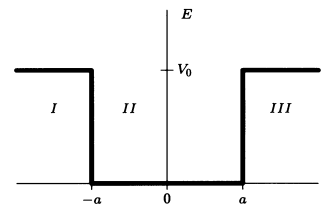

En este caso solo nos interesan los estados que tienen energía por debajo de $V_0$. En la región I, la ecuación de Schrödinger es
\begin{equation}
\frac{d^2\psi}{dx^2}-\frac{2m}{\hbar^2}(V_0-E)\psi=0
\end{equation}
que tiene una solución general
\begin{equation}
\psi_I(x)=Ce^{\beta x}+De^{-\beta x}
\end{equation}

donde $\beta=\sqrt{2m(V_0-E)/\hbar^2}$.

En la región II la solución es
\begin{equation}
\psi_{II}(x)=A\sin \alpha x+B\cos \alpha x
\end{equation}

donde $\alpha=\sqrt{2mE/\hbar^2}$.

Mientras que en la región III la solución es
\begin{equation}
\psi_{III}(x)=Fe^{-\beta x}
\end{equation}

De acuerdo a las condiciones a la frontera y la continuidad de las funciones y sus derivadas, y haciendo un poco de álgebra se llega a las soluciones
\begin{eqnarray}
\alpha \tan \alpha a=\beta \\
\alpha \cot \alpha a=-\beta
\end{eqnarray}
la primera ecuación corresponde a los estados pares, mientras que la segunda ecuación corresponde a los estados impares.

Sin embargo, para facilitar las funciones se tiene que
\begin{eqnarray}
\beta \cos \alpha a=\alpha\sin \alpha a \\
\beta \sin \alpha a=-\alpha\cos \alpha a
\end{eqnarray}

El objetivo del siguiente código es encontrar los ceros de las funciones:

In [101]:
#Codigo hecho por: Joel Alejandro Garcia Paredes
#definiendo las constantes
import numpy as np
import matplotlib.pyplot as plt
V0=10 #potencial en eV
a=3 #distancia en armstrongs
m=1 #masa en factor de masa del electron
alfamin=0
alfamax=1.62 #alfas en armstrongs a la menos 1
Emin=0
Emax=1.045 #energia en eV
h_barra=7.6199682 #h_barra en me eV* Armstrongs^2
#definiendo funciones
def alfa(E):
  return np.sqrt(2*m*E)/h_barra

def beta(E):
  return np.sqrt(2*m*(V0-E))/h_barra

def f(E):
  return beta(E)*np.cos(alfa(E)*a)-alfa(E)*np.sin(alfa(E)*a)

def g(E):
  return beta(E)-np.sin(alfa(E)*a)+alfa(E)*np.cos(alfa(E)*a)

cero en f(E): 3.0999442788361193 eV
cero en g(E): 2.010086062748087 eV


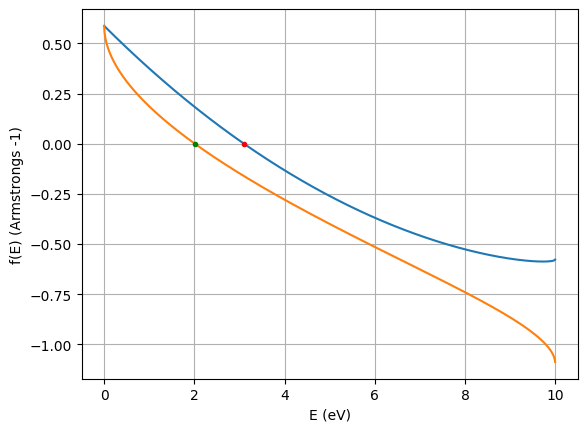

In [107]:
#buscando los ceros de la funcion
import scipy as sp
from scipy.optimize import root_scalar
solf=root_scalar(f,method='bisect',bracket=[Emin,4])
#print(solf)
solg=root_scalar(g,method='bisect',bracket=[Emin,4])
#print(solg)
print('cero en f(E):',solf.root,'eV')
print('cero en g(E):',solg.root,'eV')
Ei=np.arange(Emin,V0,0.001)
fi=f(Ei)
gi=g(Ei)
plt.plot(Ei,fi)
plt.plot(Ei,gi)
plt.plot(solf.root,f(solf.root),'.',color='red')
plt.plot(solg.root,g(solg.root),'.',color='green')
plt.xlabel('E (eV)')
plt.ylabel('f(E) (Armstrongs -1)')
plt.grid()
plt.show()